# Perceptron

## Table of Content
* What is a perceptron
* How does it look graphically
* How does it work
* How does it process inputs
* How does it output
* How does it look mathematically
* Why use it
* How to implement it

### What is a perceptron?  
An algorithm that learns binary classification. Given a dataset with 2 classes, the perceptron algorithm will find the **equation of a line** that best separates these 2 classes. The perceptron is the building block of neural network.

### How does it look graphically?  
![perceptron_full](https://user-images.githubusercontent.com/57009004/137737700-ecb9c681-d30f-4072-8b2c-8b3ba50257cb.gif)

### How does it work?  
A perceptron receives inputs, processes these inputs and then outputs a 1 or a 0. You can think of it as a light bulb that turns on or off based on the condition of the room.  

### How does it processes inputs? 
Each input has a weight assigned to it, by taking the weighted sum of the inputs the algorithm will decide whether to out put 1 or 0. Going back to the light switch example, we could think of the inputs as:  
* Is it night time?
* Is the electricity bill high?
* Room has someone?  

And lets say that we really care about the electrical bill and regardless whether it's night time or not, the lights should be switched off. *Is the electricity bill high?* has a large weight to it and contributes the most to the final decision. 

### How does it ouptut?  
The activation function decides how active is the perceptron. How bright is the light in the room. If the output of the perceptron function is either a 1 or 0 then we call this a unit step function:

| Activation function: unit step                    | Activation function: sigmoid |
|:-------------------------------------------------:|:----------------------------:|
|![unit_step_function](https://user-images.githubusercontent.com/57009004/137737723-fb29068e-9c79-4ef6-af1d-7ee7c130760a.png)|![sigmoid](https://user-images.githubusercontent.com/57009004/137737713-2b1cf3ac-c589-4b70-adee-1696d0212b40.png)|
|The unit step function is rarely used              |Sigmoid: output is a range between 0 and 1|

### How does it look mathematically?  
$$f(x)= \begin{cases}
    1,& \text{if } w\cdot x + b \geq 0\\
    0,& \text{if } w\cdot x + b < 0
\end{cases}$$ 

The **b** is the bias and it decides how easily is it for a perceptron to be active. [This](https://ninamaamary.medium.com/the-intuition-behind-perceptrons-a58a03b1b874) blog goes into detail about perceptron. However, it is not necessary to follow along with the rest of the notebook.

### Why use it?  
Let us say we have [Student Marks]( https://www.kaggle.com/shub99/student-marks). and we would like to split the students that failed from the students that passed, instead of finding the line manually let the perceptron algorithm do it for us automatically. And when we have a new student we could predict based on his/her marks whether they will pass or not.

### How to implement it?  
We know that a perceptron is just an algorithm, we saw how it looks graphically and mathimatcally. We also understood how it works *abstractlly*, but now we will use python to implement this algorithm on the [Student Marks]( https://www.kaggle.com/shub99/student-marks).      

Initially the perceptron algorithm will have random values for the weights and bias. It does not know which feature contributes the most to the final decision.   
Everytime the perceptron makes a mistake it will **tweek** the values of the weights and the bias. 

`increaseWb()` : will increase the values for the weights & bias   
`decreaseWb()` : will decrease the values for the weights & bias  


The orange points are the positive class (Passed students *1*) and the blue points are the negative class (Faild students *0*)  

![download (2)](https://user-images.githubusercontent.com/57009004/137906092-ab80f970-5236-43e9-9011-d4764ff291bf.png)  

If the perceptron predicted that a student is in the positive class when they are actually in the negative class, then that means that our boundary line is **encompasses large space for positive class** and we need to `decreaseWb()`.   

Similarly if the perceptron predicted that a student is in the negative class when they are actually positive, then that mean that our boundary line is **encompasses small space for positive class** and we need to `increaseWb()`. 

In [1]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

class Percpetron:
    def __init__(self, n_inputs):
        self.lr = 0.01

        self.W = np.array( np.random.normal(size=(n_inputs, 1)) )
        self.b = np.random.normal()   
    
    def step_function(self, value):
        if value >= 0: return 1
        return 0 
    
    def weighted_sum(self, x): 
        return np.matmul(x, self.W) + self.b
    
    def predict(self, x):
        return self.step_function( self.weighted_sum(x) )
    
    def accuracy(self, X, Y):
        correct = 0
        
        for i in range(len(Y)):  
            out = self.predict(X[i])
            if Y[i] == out:
                correct += 1

        accuracy = correct/(len(Y) - 1)
        print(f'accuracy: {accuracy}')
        
    def increaseWb(self, x):
        n = self.W.shape[0]
        
        for i in range(n):
            self.W[i] += x[i]*self.lr
        self.b += self.lr
    
    def decreaseWb(self, x):
        n = self.W.shape[0]
        
        for i in range(n):
            self.W[i] -= x[i]*self.lr
        self.b -= self.lr
    
    def train(self, X, Y, epochs=25):
        for i in range(epochs):
            for x, y in zip(X, Y):
                y_hat = self.predict(x)
                
                if y - y_hat == 1: self.increaseWb(x)
                elif y - y_hat == -1: self.decreaseWb(x)

In [2]:
import pandas as pd

data = pd.read_csv('data/marks.txt', names=['MID', 'FIN', 'PASS'])

# Normalize our values to be a range between 0 and 1
data['MID'] = data['MID'].apply(lambda x: x/100)
data['FIN'] = data['FIN'].apply(lambda x: x/100)

X = data.iloc[:, :-1].to_numpy()
Y = data['PASS'].to_numpy()

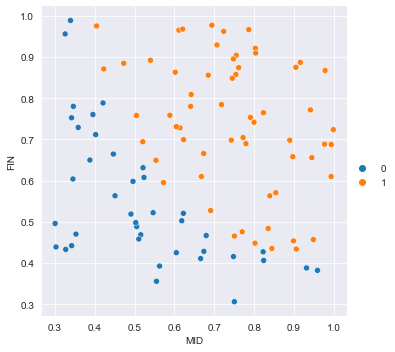

In [3]:
g = sns.FacetGrid(data, height=5)
g = g.map(sns.scatterplot, "MID", "FIN", hue=data['PASS'], edgecolor="w")
g.add_legend()

In [4]:
perceptron = Percpetron(n_inputs=2)
perceptron.train(X, Y)
perceptron.accuracy(X, Y)

accuracy: 0.9191919191919192


### Perceptrons line
As you can see this split is not perfect and we are only 92% accurate. This dataset can not be perfectly split with a line.

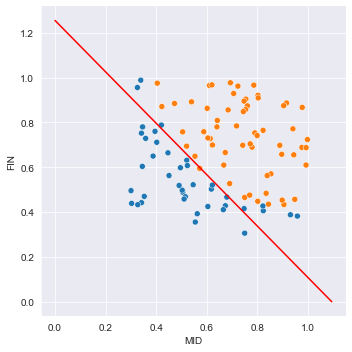

In [5]:
W = perceptron.W
b = perceptron.b

y_int = (-b/W[1])[0]
x_int = (-b/W[0])[0]

g = sns.FacetGrid(data, height=5)
g = g.map(sns.scatterplot, "MID", "FIN", hue=data['PASS'], edgecolor="w")
plt.plot([x_int, 0], [0, y_int], color='r')
plt.show()